In [1]:
# Importing Revit and IFC data

import pandas as pd
df = pd.read_csv('../input/revit-sample/Revit_Sample.csv')
df

,Id,Category,Type,Length,Volume
0,12577,Wall,Wall WD100,3200,1.0
1,15889,Wall,Wall STB 200,5400,6.0
2,76554,Door,Glazed Back Door,1300,0.3
3,74456,Window,Window 1700w,1700,0.5


In [2]:
# Filtering data in Revit and IFC projects

df[df['Category'].isin(['Wall', 'Window'])]


,Id,Category,Type,Length,Volume
0,12577,Wall,Wall WD100,3200,1.0
1,15889,Wall,Wall STB 200,5400,6.0
3,74456,Window,Window 1700w,1700,0.5


<AxesSubplot:ylabel='Length'>

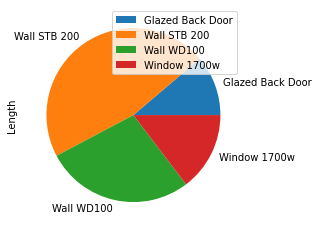

In [3]:
# Create a basic pie chart

df.groupby(['Type']).sum().plot.pie(y='Length')


In [4]:
#Regular expression in Revit and IFC

df[df['Category'].str.match('Wal*')]


,Id,Category,Type,Length,Volume
0,12577,Wall,Wall WD100,3200,1.0
1,15889,Wall,Wall STB 200,5400,6.0


In [5]:
# Grouping a Revit or IFC project by parameters

df.groupby('Category')['Volume', 'Length'].sum()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  This is separate from the ipykernel package so we can avoid doing imports until


,Volume,Length
Category,,
Door,0.3,1300
Wall,7.0,8600
Window,0.5,1700


In [6]:
#QTO - Finding volumetric quantities for the group

dfq= df[df['Category'].str.match('Wal*')]
dfq = dfq.groupby('Category')['Volume', 'Length'].sum()
dfq

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


,Volume,Length
Category,,
Wall,7.0,8600


<AxesSubplot:ylabel='Category'>

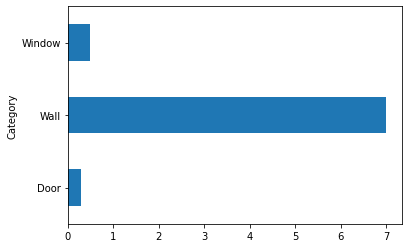

In [7]:
# Bar plot can be created as follows

dfp = df.groupby('Category')['Volume'].sum()
dfp.plot(kind='barh')


In [8]:
# Grouping with a quantity

df_groups = df.groupby(['Category'])['Volume'].agg(['sum', 'count'])
df_groups

,sum,count
Category,,
Door,0.3,1
Wall,7.0,2
Window,0.5,1


In [9]:
# Creating a grouping and saving as Excel

dfe = df.groupby(['Category'])['Length'].agg(['sum', 'count'])
dfe.to_excel("output.xlsx",sheet_name='Category_estimate')  

In [10]:
# Replacing values in parameters

df.Category = df.Category.replace("Wall", "Wände")
df

,Id,Category,Type,Length,Volume
0,12577,Wände,Wall WD100,3200,1.0
1,15889,Wände,Wall STB 200,5400,6.0
2,76554,Door,Glazed Back Door,1300,0.3
3,74456,Window,Window 1700w,1700,0.5


In [11]:
# Data filtering option

f_filter = df['Category']=='Wände'
df[f_filter]

,Id,Category,Type,Length,Volume
0,12577,Wände,Wall WD100,3200,1.0
1,15889,Wände,Wall STB 200,5400,6.0


In [12]:
# Purely integer-location based indexing for selection by position

df.iloc[2:4, 0:3]

,Id,Category,Type
2,76554,Door,Glazed Back Door
3,74456,Window,Window 1700w


In [13]:
# PDF creation library installations

!pip install fpdf

  Preparing metadata (setup.py) ... - done
  Created wheel for fpdf: filename=fpdf-1.7.2-py2.py3-none-any.whl size=40725 sha256=c51191ac666d5992ddda0598e515c9164bc10708a6bbe3f8fa3294a5b6154fab
  Stored in directory: /root/.cache/pip/wheels/d7/ca/c8/86467e7957bbbcbdf4cf4870fc7dc95e9a16404b2e3c3a98c3
Successfully built fpdf


In [14]:
from fpdf import FPDF

# Determining the volumetric characteristics of the group
s_cat = 'Window'
dfq= df[df['Category'].str.match(s_cat)]
dfq = dfq.groupby('Category')['Volume', 'Length'].sum()
cat_len = str(dfq.iloc[0]['Length'])
cat_vol = str(dfq.iloc[0]['Volume'])

# Creating a PDF document based on the parameters found
pdf = FPDF()
pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(190, 8, 'Category: ' + s_cat, 2, 1, 'L')
pdf.set_font('Arial', '', 14)
pdf.cell(190, 8, 'Sum of volumes: ' + cat_vol, 2, 1, 'L')
pdf.cell(190, 8, 'Sum of lengths: ' + cat_len, 2, 1, 'L')

# Saving a document in PDF format
pdf.output('Report_DataDrivenConstruction.pdf', 'F')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


''